#### Desarollo del modelo Power Law

El modelo de Power Law (referencia 38) es una aproximacion al analisis del crecimiento tumoral se define por la ecuacion: 

$\frac{dV}{dt}=kV^b$

donde k es la consntante de crecimiento y b define el modo de crecimiento (lineal, exponencial...)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import sympy as sp

In [2]:
#Definicion de las variables
k, b, t, V0, C1 = sp.symbols('k, b, t, V0, C1', positive = True)
V = sp.Function ('V')

In [3]:
#Descripcion del modelo
modelo_power = sp.Eq(V(t).diff(), k*V(t)**b)
modelo_power

Eq(Derivative(V(t), t), k*V(t)**b)

In [4]:
#Busqueda de las soluciones del modelo
sol_power = sp.dsolve(modelo_power)
sol_power

[Eq(V(t), Piecewise(((-C1*b + C1 - b*k*t + k*t)**(-1/(b - 1)), Ne(b, 1)), (nan, True))),
 Eq(V(t), Piecewise((C1*exp(k*t), Eq(b, 1)), (nan, True)))]

Con ello concluimos: 

Para $\gamma$ distinto de 1 vamos a encontrar la ecuacion: 

$V(t)=(-C1b+C1-kbt+kt)^{\frac{-1}{b-1}}$

Para $\gamma$ igual a 1 vamos a encontrar la ecuacion:

$V(t)=C1e^{kt}$

Por tanto, la condición $\gamma$=1 es un modelo exponencial, por lo que nos quedamos en ela situación $\gamma$ distinto a 1

In [5]:
#Escribimos la ecuacion correspondiente
power_condicion = sp.Eq(V(t), (-C1*b + C1 -k*b*t + k*t)**(-1/(b-1)))
power_condicion

Eq(V(t), (-C1*b + C1 - b*k*t + k*t)**(-1/(b - 1)))

In [6]:
#Resolvemos para t=0
power_cero = sp.Eq(V(t).subs(t,0).subs(V(0), V0), power_condicion.rhs.subs(t, 0))
power_cero

Eq(V0, (-C1*b + C1)**(-1/(b - 1)))

In [7]:
#Calculamos el valor de la constante C1
valor_c1 = sp.solve(power_cero, C1)
c1=sp.simplify(valor_c1[0])
c1

-V0**(1 - b)/(b - 1)

In [8]:
solucion_power = power_condicion.subs(C1, c1)
sp.simplify(solucion_power)

Eq(V(t), ((V0**(1 - b)*b - V0**(1 - b) - k*t*(b - 1)**2)/(b - 1))**(-1/(b - 1)))

In [9]:
pt_critico = sp.solve(modelo_power.rhs, V(t))
pt_critico

[0]

<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in power
  return (3.34242995436056*(0.197267429824677 - t)**(-1.66666666666667))


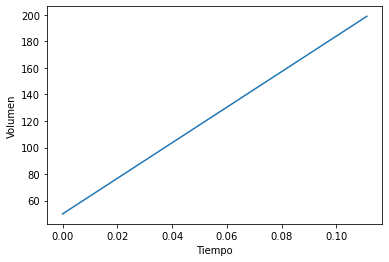

In [12]:
tiempo = np.linspace(0,1,10)

sol_exp_power = (((b*V0**(1-b))-(V0**(1-b))-k*t*((b-1)**2))/(b-1))**(-1/(b-1))
sol_exp_power1 = sp.lambdify(t, sol_exp_power.subs({b:1.6, k:0.808, V0:50}))

plt.plot(tiempo, sol_exp_power1(tiempo))
plt.xlabel("Tiempo")
plt.ylabel("Volumen")
plt.show()

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in power
  return (7.43814388980188*(0.934087354902268 - t)**(-1.66666666666667))
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in power
  return (7.43814388980188*(0.763327082983394 - t)**(-1.66666666666667))
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in power
  return (7.43814388980188*(0.656483764236173 - t)**(-1.66666666666667))


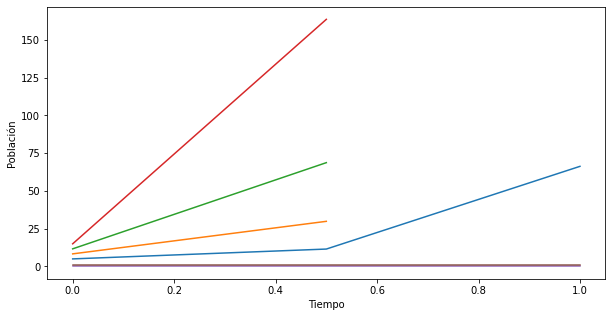

In [13]:
t, V0, k, b =sp.symbols('t V0 k b')

# Alargamos la figura para que se vean mejor de las curvas
plt.figure(figsize =(10,5))

sol_exp_power = ((b*V0**(1-b)-(V0**(1-b))-k*t*(b-1)**2)/(b-1))**(-1/(b-1))
# Generamos los valores de la variable independiente
t1 = np.linspace(0, 1, 3)

# Construimos varios bucles para representar las soluciones pedidas
# Para representar las soluciones constantes no se puede utilizar lambdify 
# Primero representamos las soluciones entre 0 y 250 
for ini in np.linspace(5, 15, 4):
    solp_l = sp.lambdify(t, sol_exp_power.subs({b:1.6, k:0.5, V0:ini}))
    plt.plot(t1, solp_l(t1))

# Acabamos representando las soluciones constantes
for ini in [0, 1]:
    plt.plot(t1, ini*np.ones(3))

#  Ponemos título a los ejes
plt.xlabel('Tiempo')
plt.ylabel('Población')

# Mostramos la figura
plt.show()